In [187]:
import pandas as pd
import numpy as np

data = pd.read_csv('predictive_maintenance.csv')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


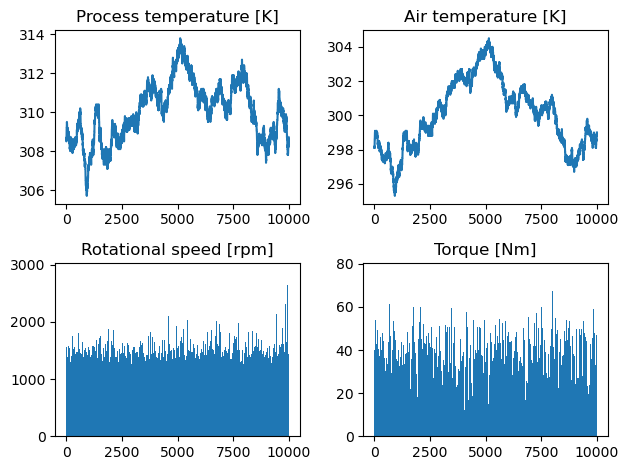

In [219]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(data["Process temperature [K]"])
ax1.set_title("Process temperature [K]")

ax2.plot(data["Air temperature [K]"])
ax2.set_title("Air temperature [K]")

ax3.bar(range(len(data["Rotational speed [rpm]"])), height=data["Rotational speed [rpm]"], width=1)
ax3.set_title("Rotational speed [rpm]")

ax4.bar(range(len(data["Torque [Nm]"])), height=data["Torque [Nm]"], width=1)
ax4.set_title("Torque [Nm]")

plt.tight_layout()
plt.show()

In [189]:
target = data["Target"]
target.unique()

array([0, 1], dtype=int64)

In [190]:
train_data = data[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]"]]
train_data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0


In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

tree = DecisionTreeClassifier()

X, y = shuffle(train_data, target)

scores = cross_val_score(tree, x_shuffled, y_shuffled, cv=5)
print(scores.mean())

0.9684000000000001


In [192]:
tree.fit(X,y)

DecisionTreeClassifier()

Mit dem trainierten Modell kann nun der Zustand eines Sensors anhand seiner Nutzdaten ermittelt werden, ohne dass eine manuelle Prüfung vor Ort durchgeführt worden ist.

In [193]:
neue_sensor_daten_1 = {
    "Air temperature [K]": [300],
    "Process temperature [K]": [300],
    "Rotational speed [rpm]": [400],
    "Torque [Nm]": [50]
}

df = pd.DataFrame(neue_sensor_daten_1)
auswertung = tree.predict(df)

if auswertung == 0:
    print("Der Sensor ist OK")
else:
    print("Es liegt ein Fehler vor")

Der Sensor ist OK


In [194]:
neue_sensor_daten_2 = {
    "Air temperature [K]": [500],
    "Process temperature [K]": [100],
    "Rotational speed [rpm]": [200],
    "Torque [Nm]": [60]
}

df = pd.DataFrame(neue_sensor_daten)
auswertung = tree.predict(df)

if auswertung == 0:
    print("Der Sensor ist OK")
else:
    print("Es liegt ein Fehler vor")

Der Sensor ist OK


Neben dem binären Fall, ob ein Fehler vorliegt oder nicht, kann auch die Fehlerart trainiert werden.

In [195]:
target = data["Failure Type"]
target.unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

tree = DecisionTreeClassifier()

X, y = shuffle(train_data, target)

scores = cross_val_score(tree, x_shuffled, y_shuffled, cv=5)
print(scores.mean())

0.9706999999999999


In [197]:
tree.fit(X,y)

DecisionTreeClassifier()

In [198]:
neue_sensor_daten_1 = {
    "Air temperature [K]": [300],
    "Process temperature [K]": [300],
    "Rotational speed [rpm]": [400],
    "Torque [Nm]": [50]
}

df = pd.DataFrame(neue_sensor_daten_1)
auswertung = tree.predict(df)

print(auswertung)

['No Failure']


In [199]:
neue_sensor_daten_2 = {
    "Air temperature [K]": [0],
    "Process temperature [K]": [12],
    "Rotational speed [rpm]": [10],
    "Torque [Nm]": [2]
}

df = pd.DataFrame(neue_sensor_daten_2)
auswertung = tree.predict(df)

print(auswertung)

['Power Failure']


In [200]:
neue_sensor_daten_3 = {
    "Air temperature [K]": [500],
    "Process temperature [K]": [100],
    "Rotational speed [rpm]": [200],
    "Torque [Nm]": [60]
}

df = pd.DataFrame(neue_sensor_daten_3)
auswertung = tree.predict(df)

print(auswertung)

['Heat Dissipation Failure']


Entscheidungsbäume sind ebenfalls in der Lage Regressions-Probleme zu lösen. So kann der Baum darauf trainiert werden, einen fehlenden Wert anhand der Vorhandenen abzuschätzen. Hierfür wird beispielhaft der Wert der Lufttemperatur aus den Trainingsdaten entfernt und als `target` gesetzt. 

In [201]:
train_data = data[["Air temperature [K]", "Process temperature [K]", "Torque [Nm]"]]
target = data[["Rotational speed [rpm]"]]
train_data.head()

,Air temperature [K],Process temperature [K],Torque [Nm]
0,298.1,308.6,42.8
1,298.2,308.7,46.3
2,298.1,308.5,49.4
3,298.2,308.6,39.5
4,298.2,308.7,40.0


Der `scoring` Parameter der Methode `cross_val_score` wird auf `neg_mean_squared_error` gesetzt. Dieser bestimmt den negativen durchschnittlichen quadrierten Fehler. Der Wert wird negiert, da sklearn versucht den Score zu maximieren.

In [202]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

tree = DecisionTreeRegressor()

X, y = shuffle(train_data, target)

scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_squared_error")
print(scores.mean())

scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())

-5251.935299999999
-57.735699999999994


In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

Betrachtung der ersten zehn Auswertungen.

In [204]:
predictions = tree.predict(X_test)

print(predictions[:10])
print(y_test["Rotational speed [rpm]"][:10])

[1566. 1486. 1656. 1384. 1836. 1530. 1525. 1301. 1719. 1339.]
2907    1581
5787    1584
6362    1738
6132    1429
6882    2073
1655    1577
4880    1527
4646    1497
5951    1650
3949    1384
Name: Rotational speed [rpm], dtype: int64


Vorhersage einiger Umdrehungsgeschwindigkeiten

In [205]:
unvollständige_sensor_daten = {
    "Air temperature [K]": [300, 320],
    "Process temperature [K]": [300, 310],
    "Torque [Nm]": [50, 60]
}

df = pd.DataFrame(unvollständige_sensor_daten)
auswertung = tree.predict(df)

print(f"Die 1. Umdrehungsgeschwindigkeit liegt schätzungsweise bei {auswertung[0]} rpm")
print(f"Die 2. Umdrehungsgeschwindigkeit liegt schätzungsweise bei {auswertung[1]} rpm")

Die 1. Umdrehungsgeschwindigkeit liegt schätzungsweise bei 1363.0 rpm
Die 2. Umdrehungsgeschwindigkeit liegt schätzungsweise bei 1227.0 rpm


 Wie vorher berechnet, liegt der Entscheidungsbaum durchschnittlich mehr als 55 rpm daneben. Ziel soll sein, diese Zahl zu minimieren. Dafür besitzt der Entscheidungsbaum einige Parameter. Wir betrachten drei Parameter und die Auswirkung auf die Performance des Baums.

In [206]:
depth_scores = []

for i in range(1, 20):
    tree = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_absolute_error")
    depth_scores.append(scores.mean())

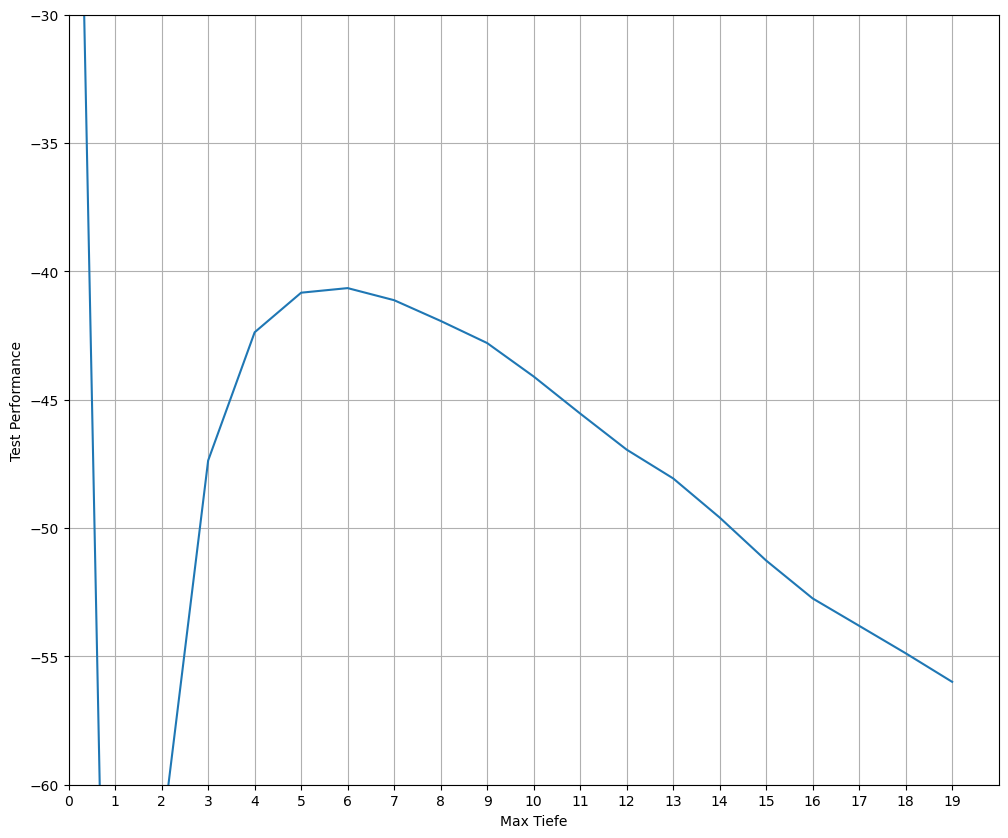

In [207]:
fig, ax = plt.subplots(figsize=(12, 10))
# plot depth scores and annotate with max score at index 3, 
plt.plot([0] + depth_scores)
# start x axis at 1 and end at 20
plt.xlim(0, 20)
plt.ylim(-60, -30)
plt.ylabel("Test Performance")
plt.xlabel("Max Tiefe")
plt.xticks(range(0, 20))
plt.grid(True)
plt.show()

In [208]:
number_categorie_scores = []

for i in range(2, 200):
    tree = DecisionTreeRegressor(min_samples_split=i)
    scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_absolute_error")
    number_categorie_scores.append(scores.mean())

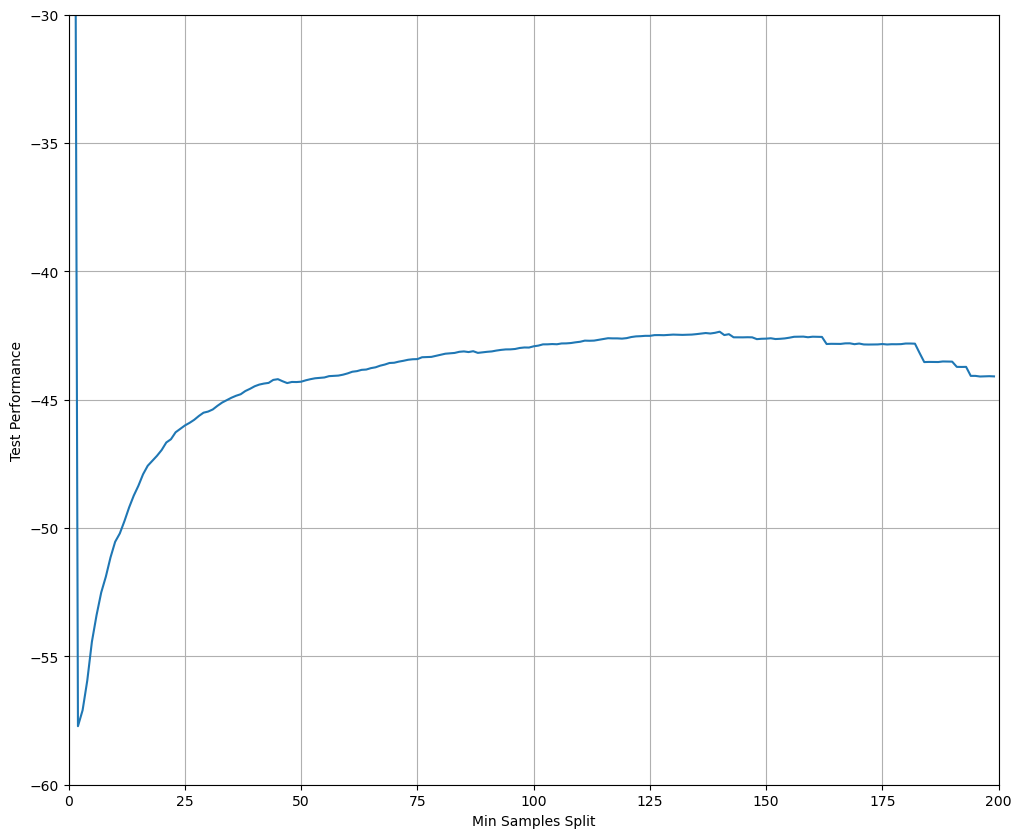

In [209]:
# plot min samples split scores and annotate with max score
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot([0,0] + number_categorie_scores)
plt.xlim(0, 200)
plt.ylim(-60, -30)
plt.ylabel("Test Performance")
plt.xlabel("Min Samples Split")
#plt.xticks(range(0, 1000, 100))
plt.grid(True)
plt.show()

In [210]:
max_leaf_nodes_scores = []

for i in range(2, 200):
    tree = DecisionTreeRegressor(max_leaf_nodes=i)
    scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_absolute_error")
    max_leaf_nodes_scores.append(scores.mean())

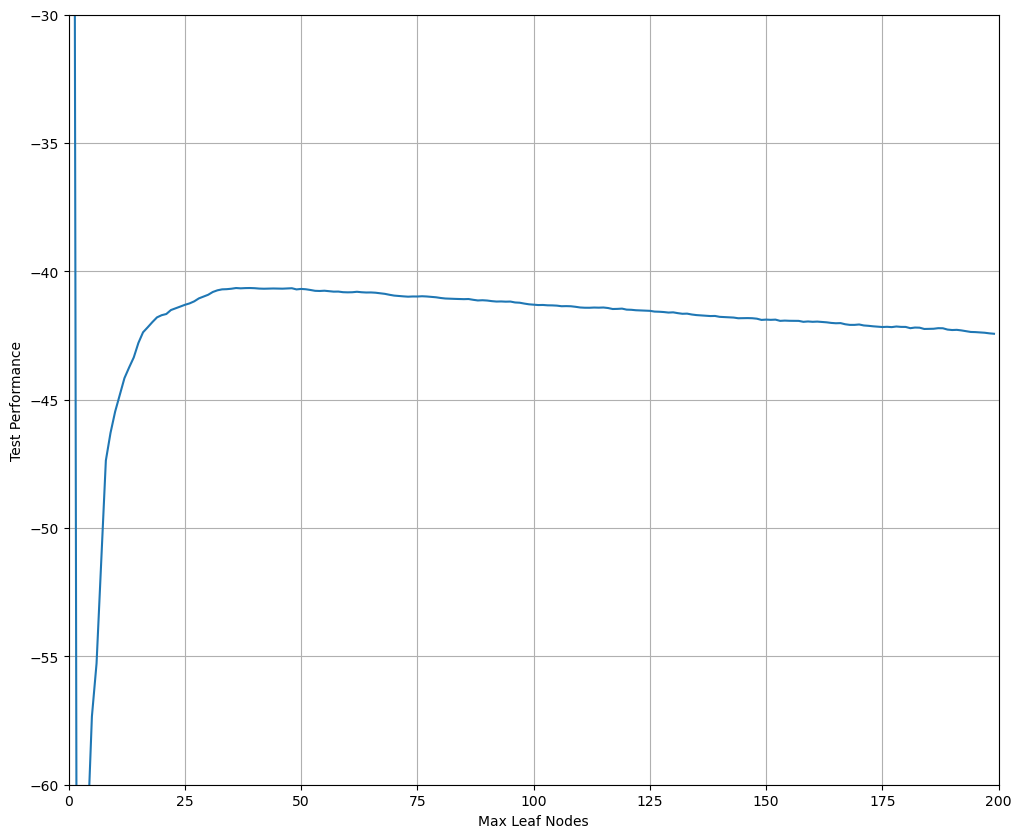

In [211]:
# plot min samples split scores and annotate with max score
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot([0,0] + max_leaf_nodes_scores)
plt.xlim(0, 200)
plt.ylim(-60, -30)
plt.ylabel("Test Performance")
plt.xlabel("Max Leaf Nodes")
#plt.xticks(range(0, 1000, 100))
plt.grid(True)
plt.show()

Mit Grid Search, lassen sich die besten Parameter in Abhängigkeit zueinander finden.

In [212]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor()

parameters = {
    'max_depth': range(4, 10),
    'min_samples_split': range(100, 180, 4),
    'max_leaf_nodes': range(20, 50, 4)
}

grid_search_cv_clf = GridSearchCV(tree, parameters, cv=5, verbose=1, scoring="neg_mean_absolute_error")
grid_search_cv_clf.fit(X, y)

grid_search_cv_clf.best_params_

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


{'max_depth': 6, 'max_leaf_nodes': 32, 'min_samples_split': 100}

Dieser Entscheidungsbaum ist um einiges besser.

In [213]:
tree = DecisionTreeRegressor(**grid_search_cv_clf.best_params_)

scores = cross_val_score(tree, X, y, cv=5, scoring="neg_mean_absolute_error")
print(scores.mean())

-41.42820540460613
